In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

What we did so far:
1. Found missing data in both dataset and training dataset
2. Replaced ambiguous data to its definitions usting provided dictionaries
3. Used train/test split on the main dataset. Logistic regression gave ~99.9% accuracy 
4. Found a useless column veil-type_partial after correlation test
5. Explored the training set. Inserted missing dummy columns with 0 values
6. Predicted class using training data on the best LR model after 10-fold cross validation
7. Challenged PCA on train/test split of the main dataset. Needs more work here

Plan:
1. Visualize data using pie/bar/hist. That mostly includes features ditributions
2. Chi square test of all features
3. Find most and less usefull features
4. Find which features affect mushrooms to be more likely poisonous/edible
5. Work on PCA
6. Do more machine learning algorithms to make a model. Roc_curve
7. Eat mushrooms

### Explore data

In [2]:
data = pd.read_csv("datasets/dataset_mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info() # list the features and main information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7921 non-null   object
 1   cap-shape                 7921 non-null   object
 2   cap-surface               7921 non-null   object
 3   cap-color                 7921 non-null   object
 4   bruises                   7921 non-null   object
 5   odor                      7921 non-null   object
 6   gill-attachment           7921 non-null   object
 7   gill-spacing              7921 non-null   object
 8   gill-size                 7921 non-null   object
 9   gill-color                7921 non-null   object
 10  stalk-shape               7921 non-null   object
 11  stalk-root                7921 non-null   object
 12  stalk-surface-above-ring  7921 non-null   object
 13  stalk-surface-below-ring  7921 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.isnull().any() 
# check if there is any missing data
# no missing data found
# however, missing data might labeled

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [5]:
# there are some '?' in the set
# let's count how many of the missing there is

for i in range(len(data.columns)):   # 0 to 22
    if ('?' in np.array(data.iloc[:,i])):   # if '?' appears in an c olumn
        print(data.iloc[:,i].value_counts())   # count values in a column and print

# 2419/7921 values in the stalk-root column is missing

b    3687
?    2419
e    1092
c     535
r     188
Name: stalk-root, dtype: int64


## Replace data using column definitions (e.g. 'p' to poisonous)

In [6]:
data_definitions = pd.read_csv("datasets/columns_definitions.csv")
data_definitions

,column_name,defs
0,class,"{""e"": ""edible"", ""p"": ""poisonous""}"
1,cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
2,cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
3,cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
4,bruises,"{""t"": ""bruises"", ""f"": ""no""}"
5,odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
6,gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
7,gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
8,gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"
9,gill-color,"{""k"": ""black"", ""n"": ""brown"", ""b"": ""buff"", ""h"":..."


In [7]:
data_definitions.set_index('column_name') 
# set column_name as index column, for convenience 

,defs
column_name,
class,"{""e"": ""edible"", ""p"": ""poisonous""}"
cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
bruises,"{""t"": ""bruises"", ""f"": ""no""}"
odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"


In [8]:
columns_dictionaries_list = [] # initialize a list which will contain dictionaries

for column_name in data_definitions.index:
    s = data_definitions.loc[column_name]['defs']
    columns_dictionaries_list.append(eval(s))

columns_dictionaries_list[:5]

[{'e': 'edible', 'p': 'poisonous'},
 {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 {'t': 'bruises', 'f': 'no'}]

In [9]:
# check whether column names are the same in both main dataset and columns description dataset

features_data = list(data.columns)
features_data_definitions = list(data_definitions['column_name'])

if (set(features_data)==set(features_data_definitions)):
    print("Same")

Same


In [10]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# at first, let's try to change first column of the dataframe
# using columns_dictionaries_list replace 'p' and 'e' into 'poisonous' and 'edible'

data['class'].replace(columns_dictionaries_list[0],inplace=True)

In [12]:
data.head() # check if raplacement was successful

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now iterate through each column

In [13]:
i = 0
for column_name in features_data:
    data[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1

In [14]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Clean data in submission dataset

In [15]:
data_submission = pd.read_csv("datasets/submission_mushrooms.csv")
data_submission.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,v,d
1,1,b,s,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,2,x,f,n,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
3,3,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
4,4,f,s,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [16]:
data_submission.info()

# 'Unnamed: 0' is useless

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                203 non-null    int64 
 1   cap-shape                 203 non-null    object
 2   cap-surface               203 non-null    object
 3   cap-color                 203 non-null    object
 4   bruises                   203 non-null    object
 5   odor                      203 non-null    object
 6   gill-attachment           203 non-null    object
 7   gill-spacing              203 non-null    object
 8   gill-size                 203 non-null    object
 9   gill-color                203 non-null    object
 10  stalk-shape               203 non-null    object
 11  stalk-root                203 non-null    object
 12  stalk-surface-above-ring  203 non-null    object
 13  stalk-surface-below-ring  203 non-null    object
 14  stalk-color-above-ring    

In [17]:
# drop useless column
data_submission.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
# check for missing data
data_submission.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [19]:
# there are some '?' in the set
# let's count how many of the missing there is

for i in range(len(data_submission.columns)):   # 0 to 21
    if ('?' in np.array(data_submission.iloc[:,i])):   # if '?' appears in an column
        print(data_submission.iloc[:,i].value_counts())   # count values in a column and print
        
# 61/202 value in the stalk-root column are missing

b    89
?    61
e    28
c    21
r     4
Name: stalk-root, dtype: int64


In [20]:
# replace valuee with definitions from the definition list of dictionaries we created earlier

data_submission_temp = data_submission.copy() # raw dataframe each time the cell is running. for convenience

i = 1
for column_name in features_data[1:]: # [1:] -> we don't need 'class' column
    data_submission_temp[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1


In [21]:
data_submission = data_submission_temp.copy() # copy back
data_submission.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,scaly,yellow,no,foul,free,close,broad,chocolate,enlarging,...,silky,brown,buff,partial,white,one,large,chocolate,several,woods
1,bell,smooth,yellow,bruises,anise,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,convex,fibrous,brown,bruises,none,free,close,broad,purple,tapering,...,smooth,pink,white,partial,white,one,pendant,brown,solitary,woods
3,knobbed,smooth,brown,no,fishy,free,close,narrow,buff,tapering,...,smooth,white,pink,partial,white,one,evanescent,white,several,paths
4,flat,smooth,red,no,foul,free,close,narrow,buff,tapering,...,silky,white,pink,partial,white,one,evanescent,white,several,woods


In [22]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [23]:
data_dummies = data.drop(columns=['class','stalk-root'],axis=1)
data_dummies = pd.get_dummies(data_dummies)

In [24]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(data['class'], classes=['edible','poisonous'])
data_dummies['class'] = Y
data_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
X

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [26]:
# ROC curve

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve

model = LR()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

accuracy_LR


1.0

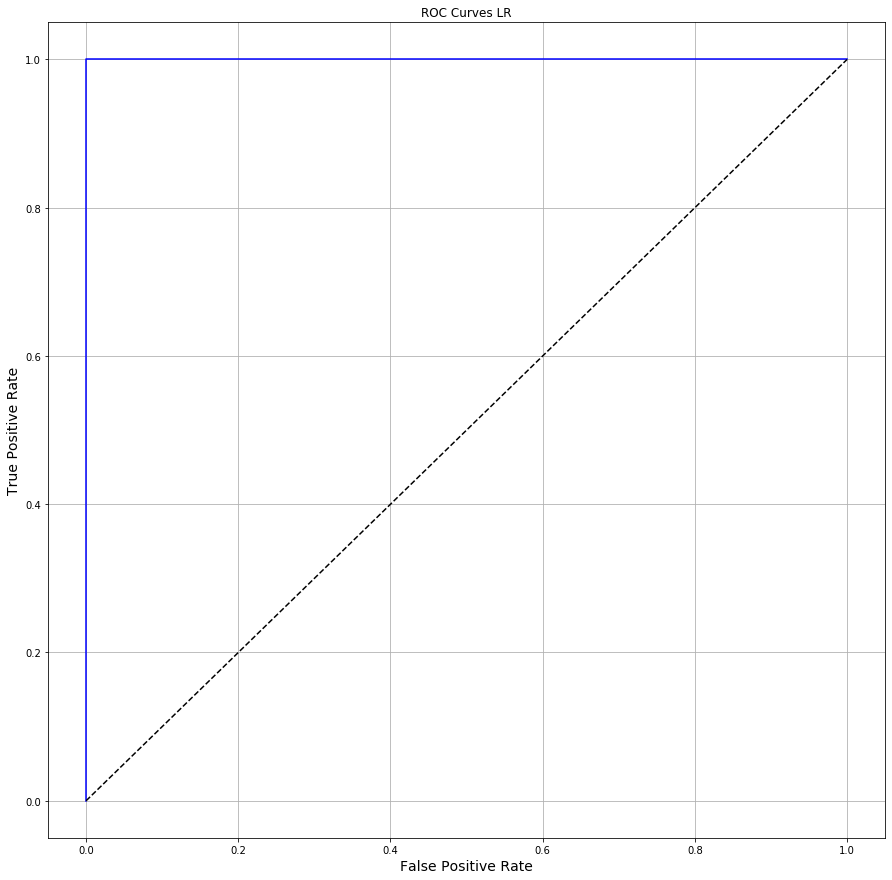

In [27]:
plt.plot(FPR_LR, TPR_LR, c="blue")
plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curves LR")
plt.gcf().set_size_inches(15,15)
#wow

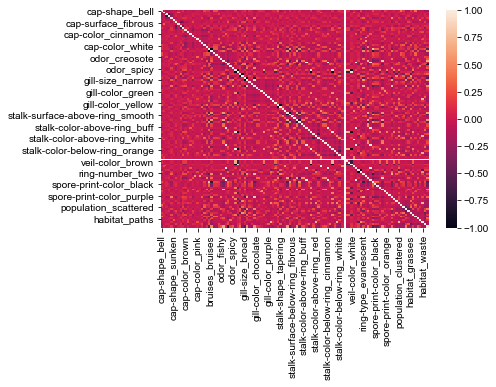

In [28]:
import seaborn as sns

sns.heatmap(data_dummies.corr())
sns.set(rc={'figure.figsize':(30,30)})

In [29]:
data_corr = data_dummies.corr(method="pearson") # data is too big to observe in Jupyter, let's work with it in Excel
data_corr.to_excel("output.xlsx") 

In [30]:
list(data_dummies.columns)

['cap-shape_bell',
 'cap-shape_conical',
 'cap-shape_convex',
 'cap-shape_flat',
 'cap-shape_knobbed',
 'cap-shape_sunken',
 'cap-surface_fibrous',
 'cap-surface_grooves',
 'cap-surface_scaly',
 'cap-surface_smooth',
 'cap-color_brown',
 'cap-color_buff',
 'cap-color_cinnamon',
 'cap-color_gray',
 'cap-color_green',
 'cap-color_pink',
 'cap-color_purple',
 'cap-color_red',
 'cap-color_white',
 'cap-color_yellow',
 'bruises_bruises',
 'bruises_no',
 'odor_almond',
 'odor_anise',
 'odor_creosote',
 'odor_fishy',
 'odor_foul',
 'odor_musty',
 'odor_none',
 'odor_pungent',
 'odor_spicy',
 'gill-attachment_attached',
 'gill-attachment_free',
 'gill-spacing_close',
 'gill-spacing_crowded',
 'gill-size_broad',
 'gill-size_narrow',
 'gill-color_black',
 'gill-color_brown',
 'gill-color_buff',
 'gill-color_chocolate',
 'gill-color_gray',
 'gill-color_green',
 'gill-color_orange',
 'gill-color_pink',
 'gill-color_purple',
 'gill-color_red',
 'gill-color_white',
 'gill-color_yellow',
 'stalk-shap

In [31]:
data_dummies.drop(columns=['veil-type_partial'],axis=1,inplace=True)
# remove useless feature "veil-type_partial" from the main dataset

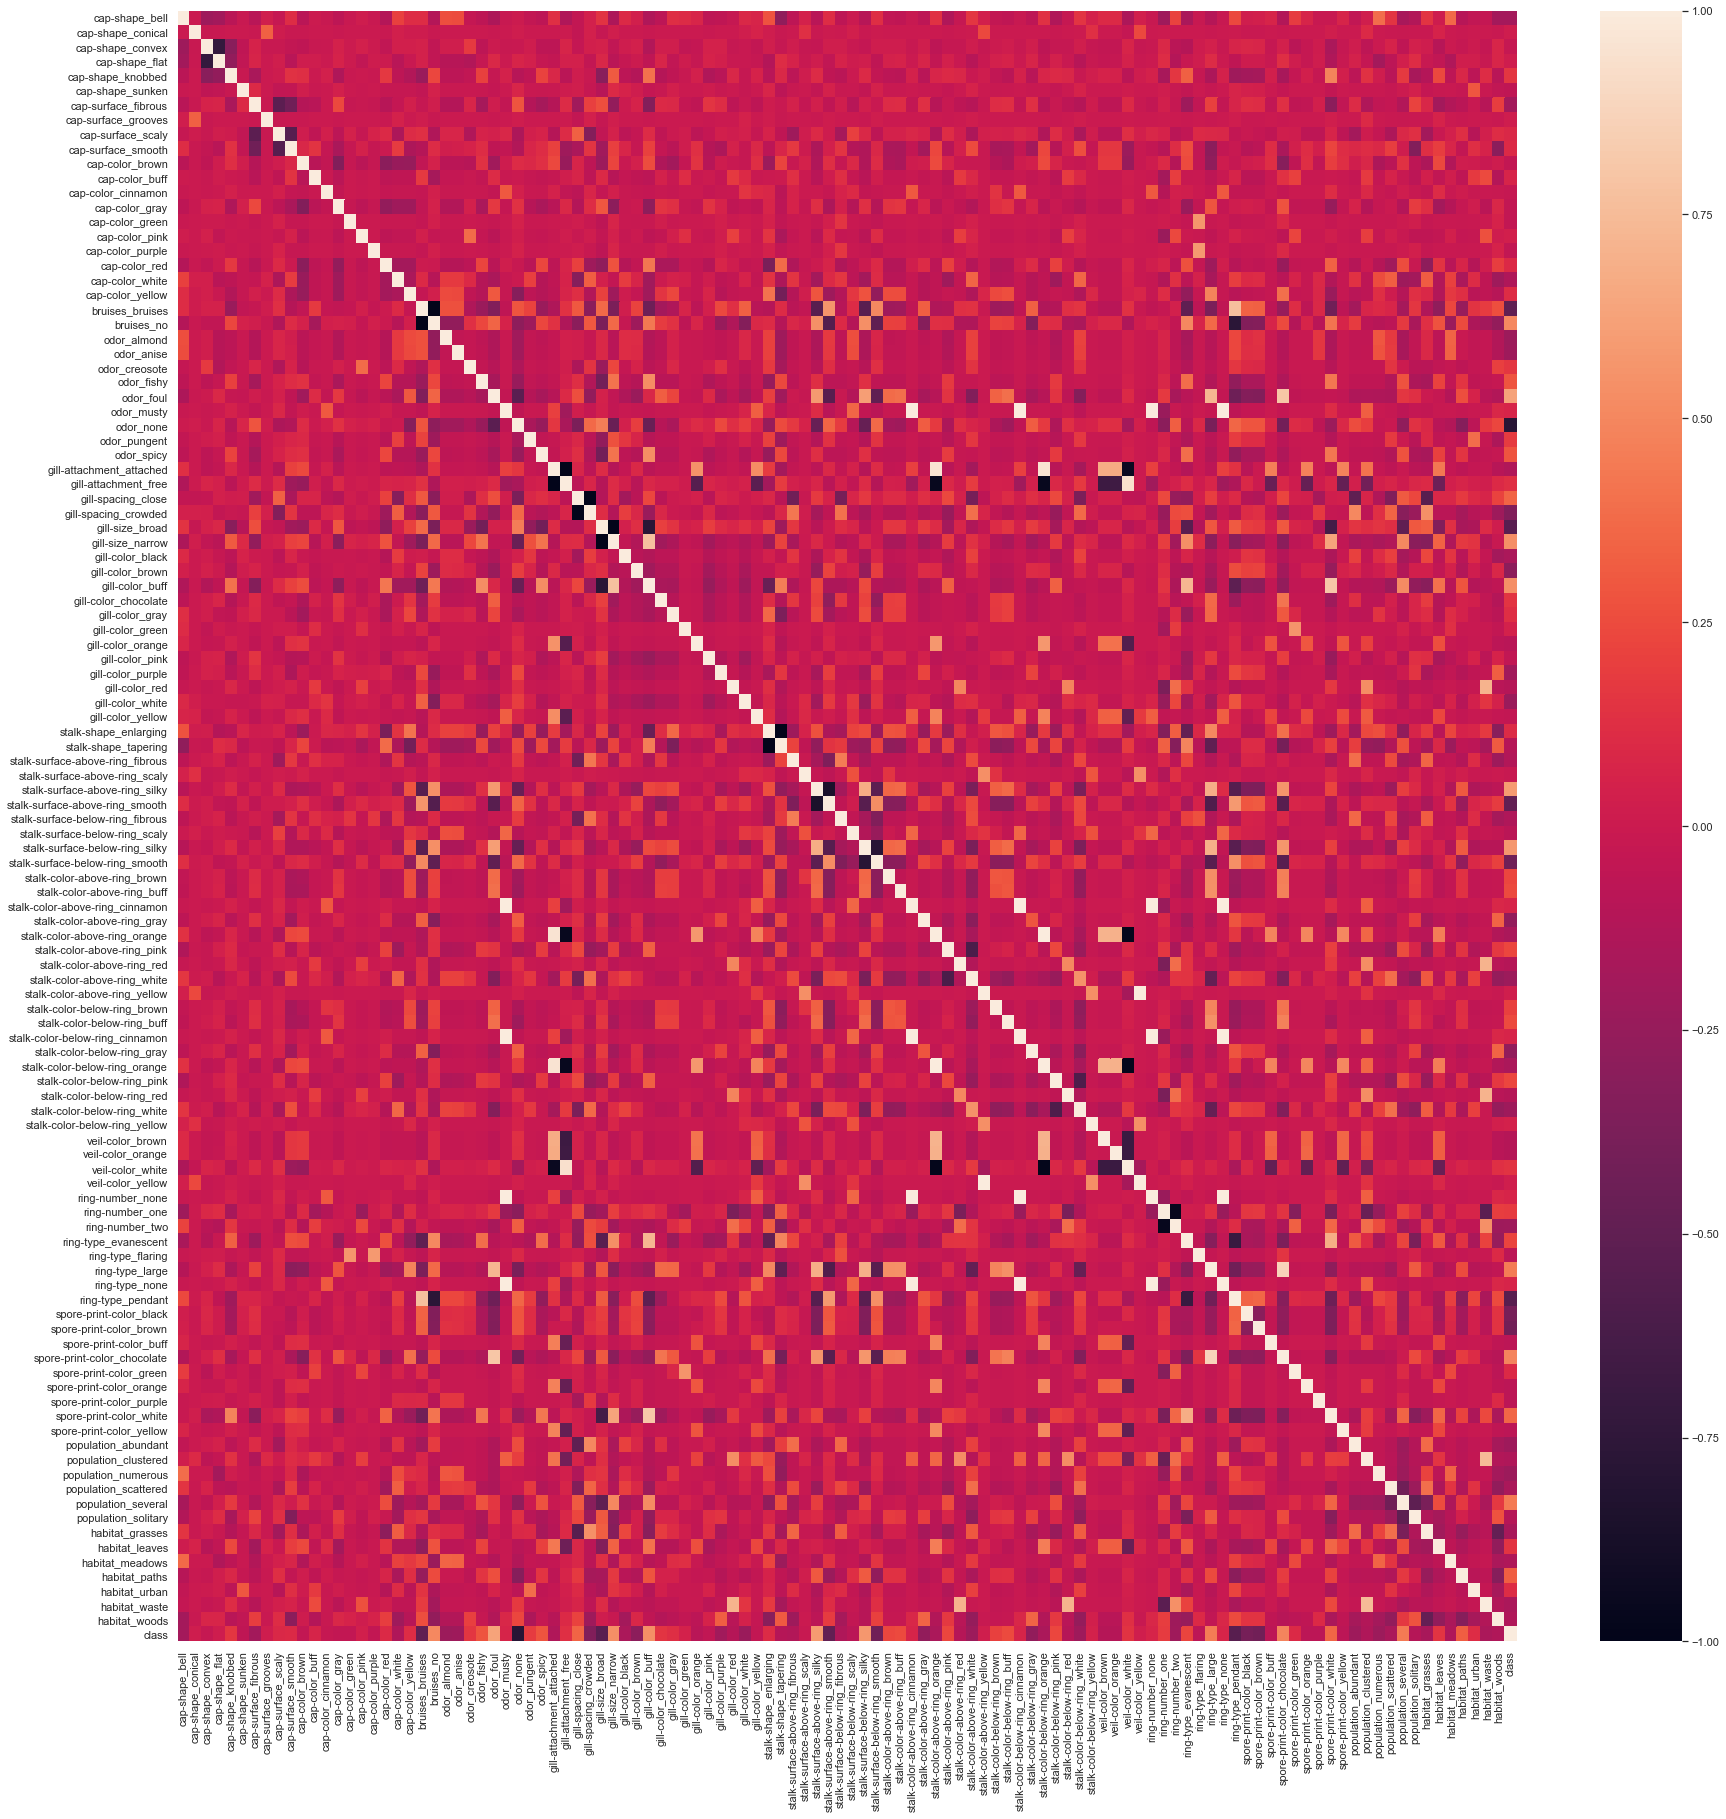

In [32]:
sns.heatmap(data_dummies.corr())
sns.set(rc={'figure.figsize':(30,30)})

In [33]:
data_submission.drop(columns=['veil-type'],axis=1,inplace=True)
# remove useless feature "veil-type_partial" from the test dataset

In [34]:
# remove feature"veil-type_partial" from the test dataset, since it has too many missing value
data_submission.drop(columns=['stalk-root'],axis=1,inplace=True)

In [35]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 203 non-null    object
 1   cap-surface               203 non-null    object
 2   cap-color                 203 non-null    object
 3   bruises                   203 non-null    object
 4   odor                      203 non-null    object
 5   gill-attachment           203 non-null    object
 6   gill-spacing              203 non-null    object
 7   gill-size                 203 non-null    object
 8   gill-color                203 non-null    object
 9   stalk-shape               203 non-null    object
 10  stalk-surface-above-ring  203 non-null    object
 11  stalk-surface-below-ring  203 non-null    object
 12  stalk-color-above-ring    203 non-null    object
 13  stalk-color-below-ring    203 non-null    object
 14  veil-color                

In [36]:
data_submission_dummies = data_submission.copy()
data_submission_dummies = pd.get_dummies(data_submission_dummies)
data_submission_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [37]:
# check the difference in columns

features_data1 = list(data_submission_dummies.columns)
features_data2 = list(data_dummies.columns)
if(set(features_data1)==set(features_data2)):
    print("Same")
else: print("Not same")

Not same


In [38]:
data_dummies.shape

(7921, 112)

In [39]:
data_submission_dummies.shape

(203, 103)

### Try to predict class from submission dataset using logistic regression and after dropping the columns
### Try to reduce data using PCA

In [40]:

dropped_data = data_dummies.drop(columns=['cap-color_purple', 
                                       'stalk-color-below-ring_cinnamon', 
                                       'odor_musty', 'spore-print-color_yellow', 
                                       'stalk-color-above-ring_cinnamon', 
                                       'ring-number_none', 
                                       'ring-type_none', 
                                       'cap-shape_sunken'],axis=1)

In [41]:
X = dropped_data.drop(columns=['class'],axis=1)
Y = dropped_data['class']
X.shape,data_submission_dummies.shape

((7921, 103), (203, 103))

In [42]:
X=np.array(X)

In [43]:
# 1 run test/train split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts, KFold

model = LogisticRegression()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train)
class_col = model.predict(data_submission_dummies)

class_col#.reshape(-1,1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0])

In [44]:
# 10-fold 

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
accuracy_kfold_list

[1.0,
 1.0,
 0.9987373737373737,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9974747474747475,
 1.0,
 1.0]

In [45]:
# predict class using the best model (actually all models where almost same with ~99.9 % accuracy)

class_col_kfold = model.predict(data_submission_dummies)
    
print(class_col_kfold)

[1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0]


In [46]:
class_col_kfold=['poisonous' if x==1 else 'edible' for x in class_col_kfold]
class_col_kfold[:15]

['poisonous',
 'edible',
 'edible',
 'poisonous',
 'poisonous',
 'edible',
 'edible',
 'edible',
 'edible',
 'edible',
 'poisonous',
 'edible',
 'edible',
 'poisonous',
 'poisonous']

In [47]:
data_submission_dummies.insert(loc=0, column='class_predicted', value=class_col_kfold)
data_submission_dummies[:10]

,class_predicted,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,edible,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,edible,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,poisonous,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,poisonous,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5,edible,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
6,edible,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,edible,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
8,edible,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,edible,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [48]:
# PCA try

from sklearn import preprocessing as p
from sklearn.decomposition import PCA

accuracy_pca_list = []
for i in range(1,6):
    
    x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
    print(x_train)
    st = p.StandardScaler().fit(x_train)
    new = st.transform(x_train)
    pca = PCA(n_components=i).fit(new)
    x_train = pca.transform(new)
    x_test = pca.transform(x_test)

    LR = LogisticRegression() 
    LR.fit(x_train, y_train) # Train

    y_pred = LR.predict(x_test)

    accuracy_pca = accuracy_score(y_test, y_pred)
    accuracy_pca_list.append(accuracy_pca)

accuracy_pca_list

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]]


[0.8712771327612318,
 0.8753154972236245,
 0.8818778394750126,
 0.8788490661282181,
 0.8556284704694599]

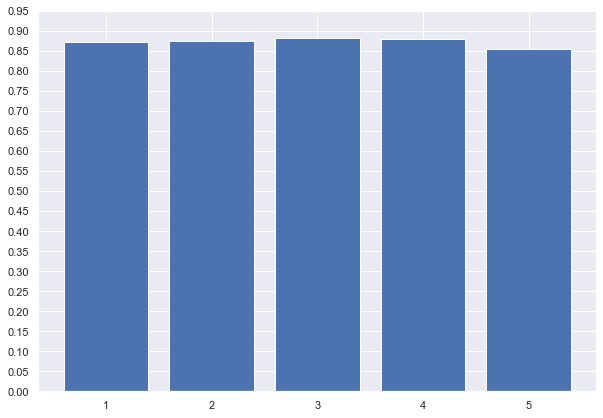

In [49]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(np.arange(1,6), accuracy_pca_list) 
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

### Try the same after adding missing column into data_submission_dummies by setting values to 0s, instead of dropping those columns from the main dataset

In [50]:
# data_dummeis has columns that data_submission_dummies does not have

print(len(data_dummies.columns))
missing_cols = set(list(data_dummies.columns))-set(list(data_submission_dummies.columns)) - {'class'}
missing_cols
# ignore class

112


{'cap-color_purple',
 'cap-shape_sunken',
 'odor_musty',
 'ring-number_none',
 'ring-type_none',
 'spore-print-color_yellow',
 'stalk-color-above-ring_cinnamon',
 'stalk-color-below-ring_cinnamon'}

In [51]:
for i in missing_cols:
    print(data_dummies.columns.get_loc(i),i)

87 ring-type_none
27 odor_musty
61 stalk-color-above-ring_cinnamon
81 ring-number_none
70 stalk-color-below-ring_cinnamon
16 cap-color_purple
5 cap-shape_sunken
97 spore-print-color_yellow


In [52]:
data_subm_dumm_raised = data_submission_dummies.copy()

In [53]:
# add missing columns into the data_submission_dummies and set values to 0s
j=0
for i in missing_cols:
    data_subm_dumm_raised.insert(data_dummies.columns.get_loc(i), i, 0, True)
    
data_subm_dumm_raised.shape

(203, 112)

In [54]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']
X.shape, data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1).shape  # check number of columns

((7921, 111), (203, 111))

In [55]:
# run 10-fold again

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    y_pred = LR.fit(x_train, y_train).predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
class_col_kfold = model.predict(data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1))

print("Accuracies in 10-forld CV\n",[round(num, 6) for num in accuracy_kfold_list])
print("\n\nClass prediction\n",class_col_kfold)

#data_sub = data_subm_dumm_raised.copy() # change the name. not the best dataframe name

Accuracies in 10-forld CV
 [1.0, 1.0, 0.998737, 1.0, 1.0, 0.998737, 0.997475, 1.0, 1.0, 1.0]


Class prediction
 [1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0]


In [56]:
# update class_predicted column (although it is >99% chance that it did not change)

class_col_kfold=['Poisonous' if x==1 else 'Edible' for x in class_col_kfold]
data_subm_dumm_raised['class_predicted'] = class_col_kfold
data_subm_dumm_raised[:5]

,class_predicted,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,Poisonous,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,Edible,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Edible,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Poisonous,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,Poisonous,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
class_predicted = data_subm_dumm_raised['class_predicted'].value_counts()
print(class_predicted)

Poisonous    111
Edible        92
Name: class_predicted, dtype: int64


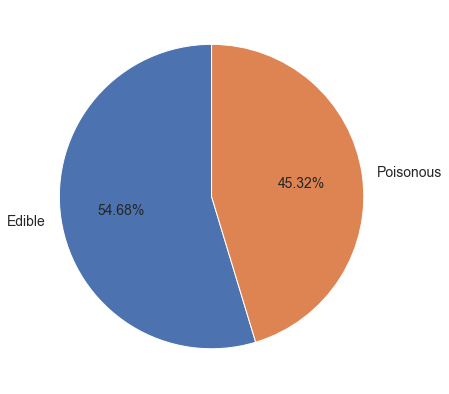

In [58]:
plt.pie(class_predicted, 
        labels=['Edible', 'Poisonous'], 
        startangle=90, 
        autopct='%1.2f%%',
        textprops={'fontsize': 14})

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

In [68]:
class_capcolor = data.groupby(['class','cap-color'])['cap-color'].size().reset_index(name='count')
class_capcolor

,class,cap-color,count
0,edible,brown,1233
1,edible,buff,46
2,edible,cinnamon,31
3,edible,gray,1008
4,edible,green,15
5,edible,pink,53
6,edible,purple,16
7,edible,red,607
8,edible,white,703
9,edible,yellow,384


In [70]:
edible_capcolor_counts = class_capcolor.iloc[:10, :]
pois_capcolor_counts = class_capcolor.iloc[10:, :]

In [71]:
edible_capcolor_counts

,class,cap-color,count
0,edible,brown,1233
1,edible,buff,46
2,edible,cinnamon,31
3,edible,gray,1008
4,edible,green,15
5,edible,pink,53
6,edible,purple,16
7,edible,red,607
8,edible,white,703
9,edible,yellow,384


In [72]:
pois_capcolor_counts

,class,cap-color,count
10,poisonous,brown,995
11,poisonous,buff,118
12,poisonous,cinnamon,12
13,poisonous,gray,791
14,poisonous,pink,86
15,poisonous,red,856
16,poisonous,white,311
17,poisonous,yellow,656


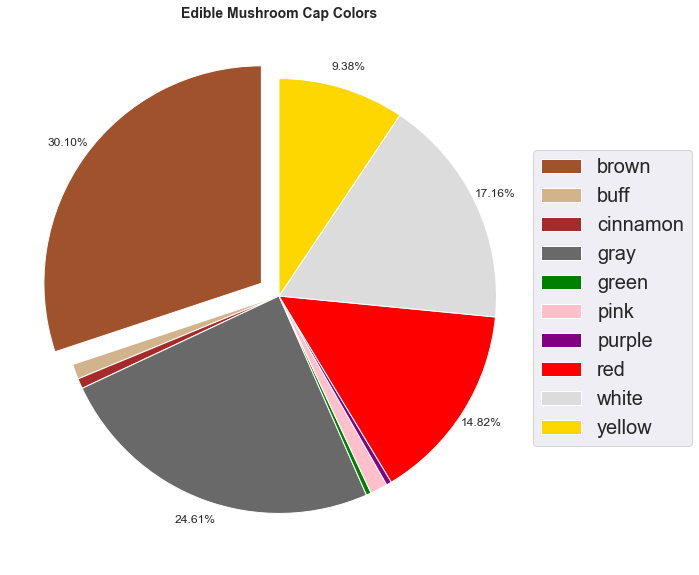

In [140]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

labels = edible_capcolor_counts['cap-color']
sizes = edible_capcolor_counts['count']
colors = ['sienna','tan','brown','dimgray','green','pink','purple','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))
pie = ax1.pie(sizes, explode=explode, colors=colors, autopct=my_autopct, pctdistance=1.1, startangle=90)
plt.title('Edible Mushroom Cap Colors', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

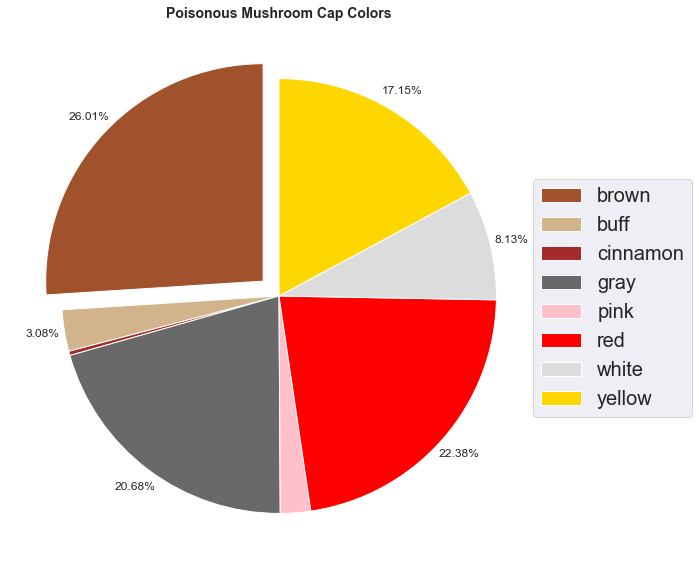

In [136]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 3 else ''

labels1 = pois_capcolor_counts['cap-color']
sizes1 = pois_capcolor_counts['count']
colors1 = ['sienna','tan','brown','dimgray', 'pink','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))
pie = ax1.pie(sizes1, explode=explode, colors=colors1, autopct=my_autopct, pctdistance=1.1, startangle=90)
plt.title('Poisonous Mushroom Cap Colors', weight='bold', size=14)
plt.legend(pie[0],labels1, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [204]:
data_for_chi2 = data.drop(columns=['class','stalk-root'],axis=1)
p_values = []

for column in data_for_chi2:
    nl = "\n"
    crosstab = pd.crosstab(data['class'], data_for_chi2[column])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    p_values.append(p)

cap-shape  bell  conical  convex  flat  knobbed  sunken
class                                                  
edible      390        0    1896  1555      223      32
poisonous    47        3    1661  1527      587       0 

Chi2 value= 474.859241481268
p-value= 2.1282999998081694e-100
Degrees of freedom= 5

cap-surface  fibrous  grooves  scaly  smooth
class                                       
edible          1522        0   1466    1108
poisonous        749        3   1697    1376 

Chi2 value= 302.98071757055976
p-value= 2.2524079466550335e-65
Degrees of freedom= 3

cap-color  brown  buff  cinnamon  gray  green  pink  purple  red  white  \
class                                                                     
edible      1233    46        31  1008     15    53      16  607    703   
poisonous    995   118        12   791      0    86       0  856    311   

cap-color  yellow  
class              
edible        384  
poisonous     656   

Chi2 value= 386.6795913355566
p-value=

P-values are small for all chi-squared tests, therefore all features are important

In [212]:
features = data_for_chi2.columns.tolist()

In [213]:
feature_pvalues = pd.DataFrame({'feature' : features,
                                'p-values' : p_values}, 
                                columns=['feature','p-values'])

In [214]:
feature_pvalues

,feature,p-values
0,cap-shape,2.128300e-100
1,cap-surface,2.252408e-65
2,cap-color,9.505304e-78
3,bruises,0.000000e+00
4,odor,0.000000e+00
5,gill-attachment,4.237619e-30
6,gill-spacing,4.737407e-213
7,gill-size,0.000000e+00
8,gill-color,0.000000e+00
9,stalk-shape,5.573907e-20


In [218]:
feature_pvalues = feature_pvalues.sort_values('p-values',ascending=True)
feature_pvalues

,feature,p-values
3,bruises,0.000000e+00
11,stalk-surface-below-ring,0.000000e+00
13,stalk-color-below-ring,0.000000e+00
4,odor,0.000000e+00
7,gill-size,0.000000e+00
8,gill-color,0.000000e+00
20,habitat,0.000000e+00
12,stalk-color-above-ring,0.000000e+00
10,stalk-surface-above-ring,0.000000e+00
17,ring-type,0.000000e+00
